In [2]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Sentiment Analysis
import vaderSentiment 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import matplotlib.pyplot as plt

## Abortion

In [151]:
# load data
path_to_file = 'Abortion/abortion.csv'

df_ab = pd.read_csv(path_to_file)

df.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,3,"[['Victor Davis Hanson', '0.7887'], ['None', '...",['http://breitbart.com/california/2015/12/09/r...,E
1,1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,3,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",['http://www.wnd.com/2015/09/this-is-the-great...,E
2,1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,2,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",['http://uproxx.com/dimemag/2015/05/all-the-cr...,E
3,1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,1,"[['None', '0.9263'], ['Alveda King', '0.0737']]",['http://www.westernjournalism.com/martin-luth...,E
4,1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,1,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",['http://hotair.com/headlines/archives/2015/09...,E


In [152]:
# delete columns
df_ab.__delitem__('numOccurrences')
df_ab.__delitem__('urls')
df_ab.__delitem__('phase')

df_ab.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas
0,1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '..."
1,1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['..."
2,1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra..."
3,1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]"
4,1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'..."


In [153]:
# initializing the analyzer
analyzer = SentimentIntensityAnalyzer()


# sentiments
positive_sent_ab = []
negative_sent_ab = []
total_sent_ab = []

[positive_sent_ab.append(analyzer.polarity_scores(quote)['pos']) for quote in df_ab['quotation']]
[negative_sent_ab.append(analyzer.polarity_scores(quote)['neg']) for quote in df_ab['quotation']]
[total_sent_ab.append(analyzer.polarity_scores(quote)['compound']) for quote in df_ab['quotation']]

print()

(0, 1)

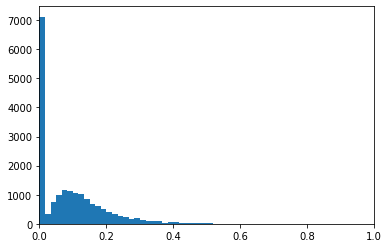

In [115]:
plt.hist(positive_sent_ab, bins = 50)
plt.xlim([0,1])

(0, 1)

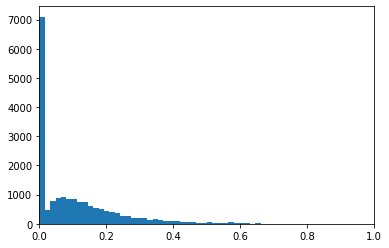

In [116]:
plt.hist(negative_sent_ab, bins = 50)
plt.xlim([0,1])

(-1, 1)

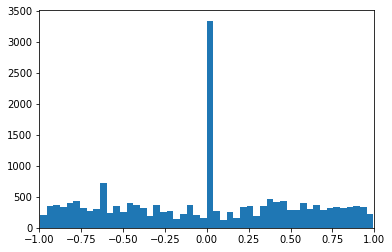

In [117]:

plt.hist(total_sent_ab, bins = 50)
plt.xlim([-1,1])

In [154]:
# add sentiment columns
df_ab['positive scores'] =  positive_sent_ab
df_ab['negative scores'] =  negative_sent_ab
df_ab['compound scores'] =  total_sent_ab
df_ab.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
0,1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '...",0.064,0.104,-0.5719
1,1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",0.169,0.065,0.8350
2,1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",0.124,0.000,0.6249
3,1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]",0.000,0.000,0.0000
4,1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",0.092,0.249,-0.6486


In [155]:
# print total number of positive, negative and neutral quotes
print('number of positive sent: ', sum(np.array(total_sent_ab)>= 0.05))
print('number of negative sent: ', sum(np.array(total_sent_ab)<= -0.05))
print('number of neutral sent: ', sum(np.abs(np.array(total_sent_ab))<= 0.05))

number of positive sent:  14568
number of negative sent:  10997
number of neutral sent:  6802


In [164]:
# calculate average positive, negative and neutral scores
mean_pos_ab = df_ab[df_ab['compound scores']>= 0.5]['compound scores'].mean()
mean_neg_ab =  df_ab[df_ab['compound scores'] <= -0.5]['compound scores'].mean()
mean_neu_ab =  df_ab[np.abs(df_ab['compound scores']) <= 0.5]['compound scores'].mean()
print('average positive score:', mean_pos_ab)
print('average negative score: ', mean_neg_ab)
print('average neutral score: ', mean_neu_ab)

average positive score: 0.7284923711619181
average negative score:  -0.7229551064991822
average neutral score:  0.029612791294528183


## Global Warming

In [126]:
# load data
path_to_file = 'Global_warming/global_warming.csv'

df_gw = pd.read_csv(path_to_file)


In [127]:
# delete columns
df_gw.__delitem__('numOccurrences')
df_gw.__delitem__('urls')
df_gw.__delitem__('phase')

df_gw.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas
0,321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256..."
1,828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04..."
2,936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]"
3,1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]"
4,1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]"


In [128]:
# sentiments
positive_sent_gw = []
negative_sent_gw = []
total_sent_gw = []

[positive_sent_gw.append(analyzer.polarity_scores(quote)['pos']) for quote in df_gw['quotation']]
[negative_sent_gw.append(analyzer.polarity_scores(quote)['neg']) for quote in df_gw['quotation']]
[total_sent_gw.append(analyzer.polarity_scores(quote)['compound']) for quote in df_gw['quotation']]

print()

(0, 1)

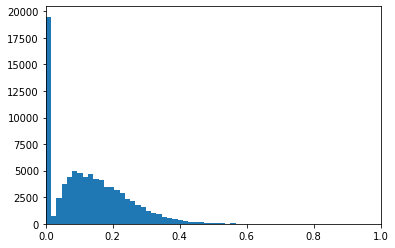

In [95]:
plt.hist(positive_sent_gw, bins = 50)
plt.xlim([0,1])

(0, 1)

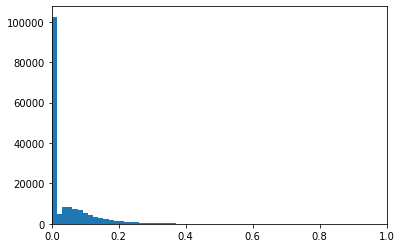

In [130]:
plt.hist(negative_sent_gw, bins = 50)
plt.xlim([0,1])

(-1, 1)

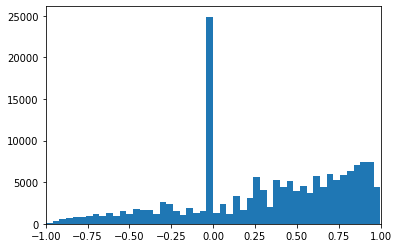

In [131]:
plt.hist(total_sent_gw, bins = 50)
plt.xlim([-1,1])

In [132]:
# add sentiment columns
df_gw['positive scores'] =  positive_sent_gw
df_gw['negative scores'] =  negative_sent_gw
df_gw['compound scores'] =  total_sent_gw
df_gw.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
0,321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650
1,828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901
2,936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000
3,1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956
4,1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263


In [135]:
# print total number of positive, negative and neutral quotes
print('number of positive sent: ', sum(np.array(total_sent_gw)>= 0.05))
print('number of negative sent: ', sum(np.array(total_sent_gw)<= -0.05))
print('number of neutral sent: ', sum(np.abs(np.array(total_sent_gw))<= 0.05))

number of positive sent:  110164
number of negative sent:  29821
number of neutral sent:  26390


In [163]:
# calculate average positive, negative and neutral scores
mean_pos_gw = df_gw[df_gw['compound scores']>= 0.5]['compound scores'] .mean()
mean_neg_gw =  df_gw[df_gw['compound scores']<= -0.5]['compound scores'] .mean()
mean_neu_gw =  df_gw[np.abs(df_gw['compound scores'])<= 0.5]['compound scores'] .mean()
print('average positive score:', mean_pos_gw)
print('average negative score: ', mean_neg_gw)
print('average neutral score: ', mean_neu_gw)

average positive score: 0.7700554617157257
average negative score:  -0.6916190387133041
average neutral score:  0.08420222786698688


0.7700554617157257

## Gender Inequality

In [100]:
# load data
path_to_file = 'Gender_Inequality/gender_inequality.csv'

df_gi = pd.read_csv(path_to_file)

df.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,3,"[['Victor Davis Hanson', '0.7887'], ['None', '...",['http://breitbart.com/california/2015/12/09/r...,E
1,1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,3,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",['http://www.wnd.com/2015/09/this-is-the-great...,E
2,1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,2,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",['http://uproxx.com/dimemag/2015/05/all-the-cr...,E
3,1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,1,"[['None', '0.9263'], ['Alveda King', '0.0737']]",['http://www.westernjournalism.com/martin-luth...,E
4,1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,1,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",['http://hotair.com/headlines/archives/2015/09...,E


In [101]:
# delete columns
df_gi.__delitem__('numOccurrences')
df_gi.__delitem__('urls')
df_gi.__delitem__('phase')

df_gi.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas
0,3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'..."
1,3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]"
2,3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0..."
3,3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'..."
4,3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11..."


In [144]:
# sentiments
positive_sent_gi = []
negative_sent_gi = []
total_sent_gi = []

[positive_sent_gi.append(analyzer.polarity_scores(quote)['pos']) for quote in df_gi['quotation']]
[negative_sent_gi.append(analyzer.polarity_scores(quote)['neg']) for quote in df_gi['quotation']]
[total_sent_gi.append(analyzer.polarity_scores(quote)['compound']) for quote in df_gi['quotation']]

print()

(0, 1)

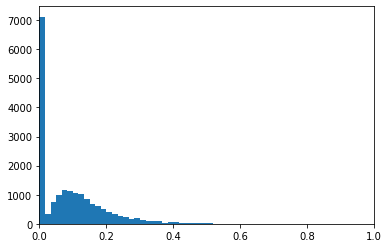

In [145]:
plt.hist(positive_sent_gi, bins = 50)

plt.xlim([0,1])

(0, 1)

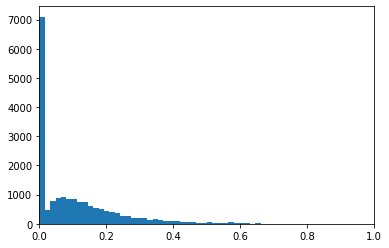

In [146]:
plt.hist(negative_sent_gi,bins = 50)
plt.xlim([0,1])

(-1, 1)

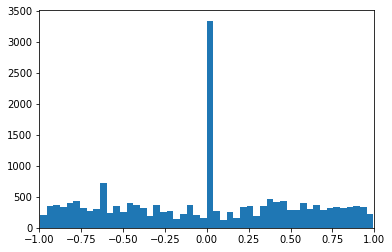

In [147]:
plt.hist(total_sent_gi, bins = 50)

plt.xlim([-1,1])

In [148]:
# add sentiment columns
df_gi['positive scores'] =  positive_sent_gi
df_gi['negative scores'] =  negative_sent_gi
df_gi['compound scores'] =  total_sent_gi
df_gi.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
0,3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717
1,3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000
2,3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144
3,3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000
4,3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000


In [149]:
print('number of positive sent: ', sum(np.array(total_sent_gi)>= 0.05))
print('number of negative sent: ', sum(np.array(total_sent_gi)<= -0.05))
print('number of neutral sent: ', sum(np.abs(np.array(total_sent_gi))<= 0.05))

number of positive sent:  7446
number of negative sent:  7633
number of neutral sent:  3518


In [165]:
# calculate average positive, negative and neutral scores
mean_pos_gi = df_gi[df_gi['compound scores'] >= 0.5]['compound scores'].mean()
mean_neg_gi =  df_gi[df_gi['compound scores'] <= -0.5]['compound scores'].mean()
mean_neu_gi =  df_gi[np.abs(df_gi['compound scores']) <= 0.5]['compound scores'].mean()
print('average positive score:', mean_pos_gi)
print('average negative score: ', mean_neg_gi)
print('average neutral score: ', mean_neu_gi)

average positive score: 0.7395042954031645
average negative score:  -0.739078281568803
average neutral score:  0.01056522292993632


## Gun Control

In [150]:
df_ab.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
0,3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717
1,3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000
2,3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144
3,3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000
4,3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000


In [157]:
# save dataframes
df_gw.to_csv('global_warming_sent.csv',index = False)
df_ab.to_csv('abortion_sent.csv', index = False)
df_gi.to_csv('gender_inequality_sent.csv', index = False)